In [24]:
import warnings
warnings.simplefilter("ignore", category=UserWarning)

import pylab as plt

# Set a standard figure size to use
plt.rcParams['figure.figsize'] = (15.0, 15.0)

# LSST Science Pipelines (Stack) packages
import lsst.daf.butler as dafButler
import lsst.afw.display as afwDisplay

afwDisplay.setDefaultBackend('matplotlib')

In [8]:
repo = '/sps/lsst/users/boutigny/gen3-demo-1/butler.yaml'
butler = dafButler.Butler(repo)
registry = butler.registry

In [9]:
for c in sorted(registry.queryCollections()):
    print(c)

LATISS/calib
LATISS/calib/DM-28636
LATISS/calib/DM-28636/curated/19700101T000000Z
LATISS/calib/DM-28636/curated/20180101T000000Z
LATISS/calib/DM-28636/unbounded
LATISS/calib/DM-33875
LATISS/raw/all
refcats
u/calib/DM-32209-20211013a-felh
u/calib/DM-32209-20211013a-g
u/czw/DM-28920/biasGen.20210702a/20210702T215049Z
u/czw/DM-28920/calib/bias.20210720
u/czw/DM-28920/calib/dark.20210720a
u/czw/DM-28920/calib/defect.20210720a
u/czw/DM-28920/calib/flat.20210720
u/czw/DM-28920/darkGen.20210707d/20210707T215331Z
u/czw/DM-28920/defectGen.20210720a/20210720T230634Z
u/czw/DM-28920/flatGen.20210720Xa/20210720T223935Z
u/czw/DM-28920/flatGen.20210720Xb/20210720T225330Z
u/czw/DM-32209/flatGen.20211013a-felh/20211013T214128Z
u/czw/DM-32209/flatGen.20211013a-g/20211013T185808Z
u/edennihy/DM-33875/flatGen.20220303a-SDSSi/20220303T213603Z
u/edennihy/DM-33875/flatGen.20220303b-SDSSr/20220303T194524Z


In [10]:
for x in sorted(registry.queryDatasetTypes()):
    print(x)

DatasetType('bias', {instrument, detector}, ExposureF, isCalibration=True)
DatasetType('camera', {instrument}, Camera, isCalibration=True)
DatasetType('dark', {instrument, detector}, ExposureF, isCalibration=True)
DatasetType('defects', {instrument, detector}, Defects, isCalibration=True)
DatasetType('flat', {band, instrument, detector, physical_filter}, ExposureF, isCalibration=True)
DatasetType('gaia_dr2_20191105', {htm7}, SimpleCatalog)
DatasetType('raw', {band, instrument, detector, physical_filter, exposure}, Exposure)


In [12]:
collection = "LATISS/raw/all"
butler = dafButler.Butler(repo, collections=collection)
registry = butler.registry

In [13]:
datasetRefs = list(registry.queryDatasets(datasetType='raw'))

In [14]:
len(datasetRefs)

719

In [16]:
datasetRefs = registry.queryDatasets(datasetType='raw', collections=collection)

for i, ref in enumerate(datasetRefs):
    print(ref.dataId.full)
    if i > 2:
        break

{band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'RG610~empty', exposure: 2021070700132}
{band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'RG610~empty', exposure: 2021070700477}
{band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'RG610~empty', exposure: 2021070700157}
{band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'RG610~empty', exposure: 2021070700373}


In [18]:
for dim in ['exposure', 'detector']:
    print(list(registry.queryDimensionRecords(dim, where='exposure = 2021070700132 and detector=0'))[0])
    print()

exposure:
  instrument: 'LATISS'
  id: 2021070700132
  physical_filter: 'RG610~empty'
  obs_id: 'AT_O_20210707_000132'
  exposure_time: 5.0
  dark_time: 5.32754373550415
  observation_type: 'science'
  observation_reason: 'science'
  day_obs: 20210707
  seq_num: 132
  group_name: '2021-07-08T00:36:15.230'
  group_id: 2056341752300000
  target_name: 'HD 122529'
  science_program: 'unknown'
  tracking_ra: 210.595406063217
  tracking_dec: 8.48819912739062
  sky_angle: 112.86391831802001
  zenith_angle: 40.6585761324532
  timespan: Timespan(begin=astropy.time.Time('2021-07-08 00:36:20.424493', scale='tai', format='iso'), end=astropy.time.Time('2021-07-08 00:36:25.664000', scale='tai', format='iso'))

detector:
  instrument: 'LATISS'
  id: 0
  full_name: 'RXX_S00'
  name_in_raft: 'RXX_S00'
  raft: None
  purpose: 'SCIENCE'



In [22]:
coaddId = {'exposure': 2021070700317, 'detector': 0}
image = butler.get('raw', dataId=coaddId)

/sps/lsst/users/boutigny/gen3-demo-1/LATISS/raw/all/raw/20210707/AT_O_20210707_000317/raw_LATISS_empty~holo4_003_AT_O_20210707_000317_RXX_S00_LATISS_raw_all.fits: outAmp.getRawBBox() != data.getBBox(); patching. ((minimum=(0, 0), maximum=(543, 2047)) v. (minimum=(0, 0), maximum=(575, 2047)))


(-0.5, 4607.5, -0.5, 4095.5)

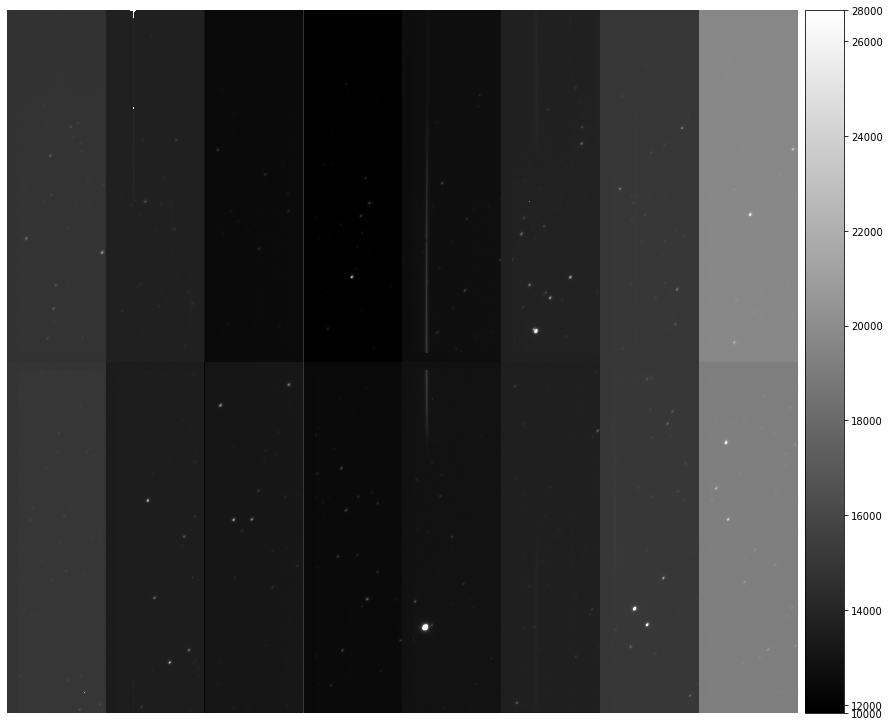

In [32]:
# Display the image
fig = plt.figure()
afw_display = afwDisplay.Display(1)
afw_display.scale('linear', 'zscale')
afw_display.mtv(image.image)
plt.gca().axis('off')

In [28]:
afw_display.scale??

Signature: afw_display.scale(algorithm, min, max=None, unit=None, *args, **kwargs)
Source:   
    def scale(self, algorithm, min, max=None, unit=None, *args, **kwargs):
        """Set the range of the scaling from DN in the image to the image display

        Parameters
        ----------
        algorithm : `str`
            Desired scaling (e.g. "linear" or "asinh")
        min
            Minimum value, or "minmax" or "zscale"
        max
            Maximum value (must be `None` for minmax|zscale)
        unit
            Units for min and max (e.g. Percent, Absolute, Sigma; `None` if min==minmax|zscale)
        *args
            Optional arguments to the backend
        **kwargs
            Optional keyword arguments to the backend
        """
        if min in ("minmax", "zscale"):
            assert max is None, f"You may not specify \"{min}\" and max"
            assert unit is None, f"You may not specify \"{min}\" and unit"
        elif max is None:
            raise RuntimeEr